# Table of Contents
 <p>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# module import
import numpy as np
import pandas as pd
import matplotlib
import math
import datetime
import matplotlib.pyplot as plt
plt.rc("figure", autolayout=True)
from mpl_toolkits.basemap import Basemap
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [2]:
from pandas.tools.plotting import autocorrelation_plot

In [3]:
import os
station_filenames = [
 '725450.14990.processed.2015.2015.csv',
 '725460.14933.processed.2015.2015.csv',
 '725480.94910.processed.2015.2015.csv',
 '725485.14940.processed.2015.2015.csv',
 ]

In [4]:
def add_dates(df):
    df_dates = [datetime.datetime(*map(int, r[1][["year","month","day","hour","min","seconds"]])) for r in df.iterrows()]
#     df["datetime"] = df_dates
    temp_series = pd.Series(df["temp"].values, index=pd.DatetimeIndex(df_dates))
#     df.set_index(keys=["datetime"], inplace=True)
#     return df["temp"]
    return temp_series
    
hourly_ls = [pd.read_csv("data2015/"+fn, names=["year", "month", "day", "hour", "min", "seconds","temp"]) 
    for fn in station_filenames[:10]]
hourly_ls = list(map(add_dates, hourly_ls))

In [7]:
first = hourly_ls[0]
len(first)

11569

(735599.0, 735700.0)

/Users/imolk/bin/venv_python3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


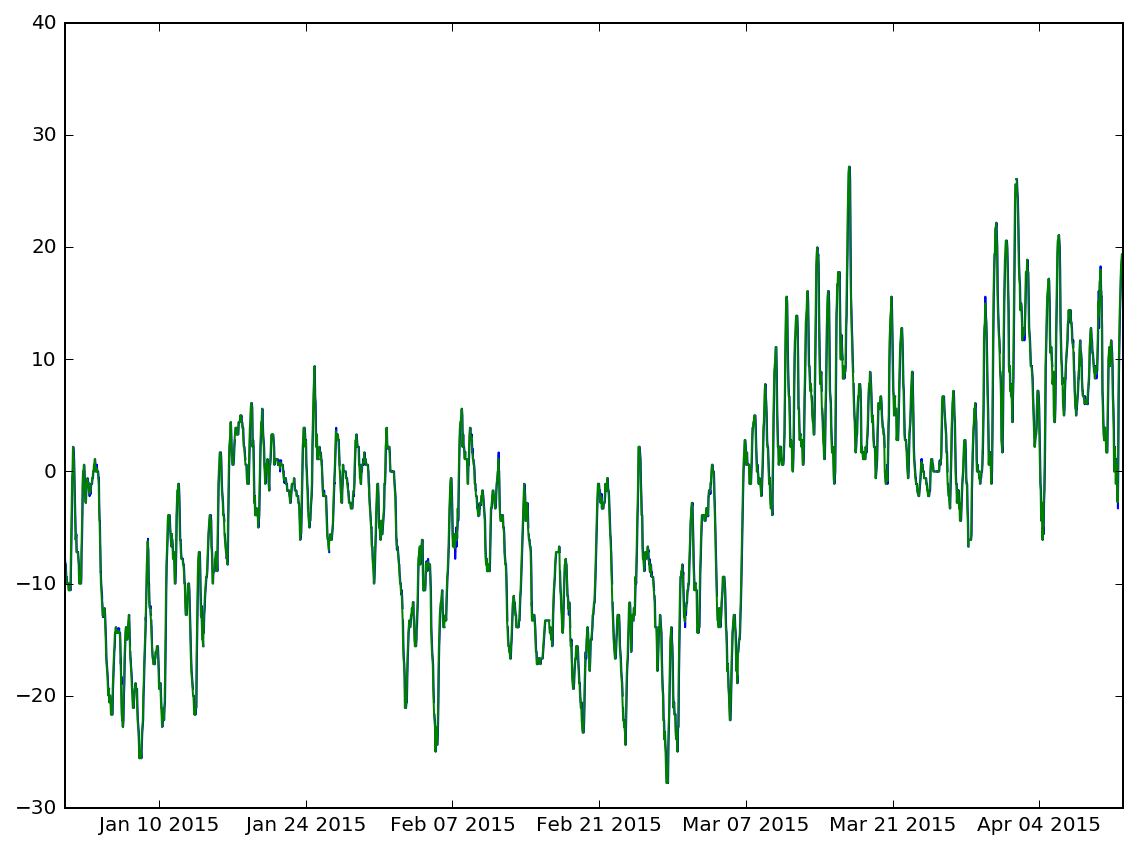

In [8]:
plt.plot(first)
plt.plot(first.resample('1H').mean())
plt.xlim(735599.0, 735700.0)

/Users/imolk/bin/venv_python3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


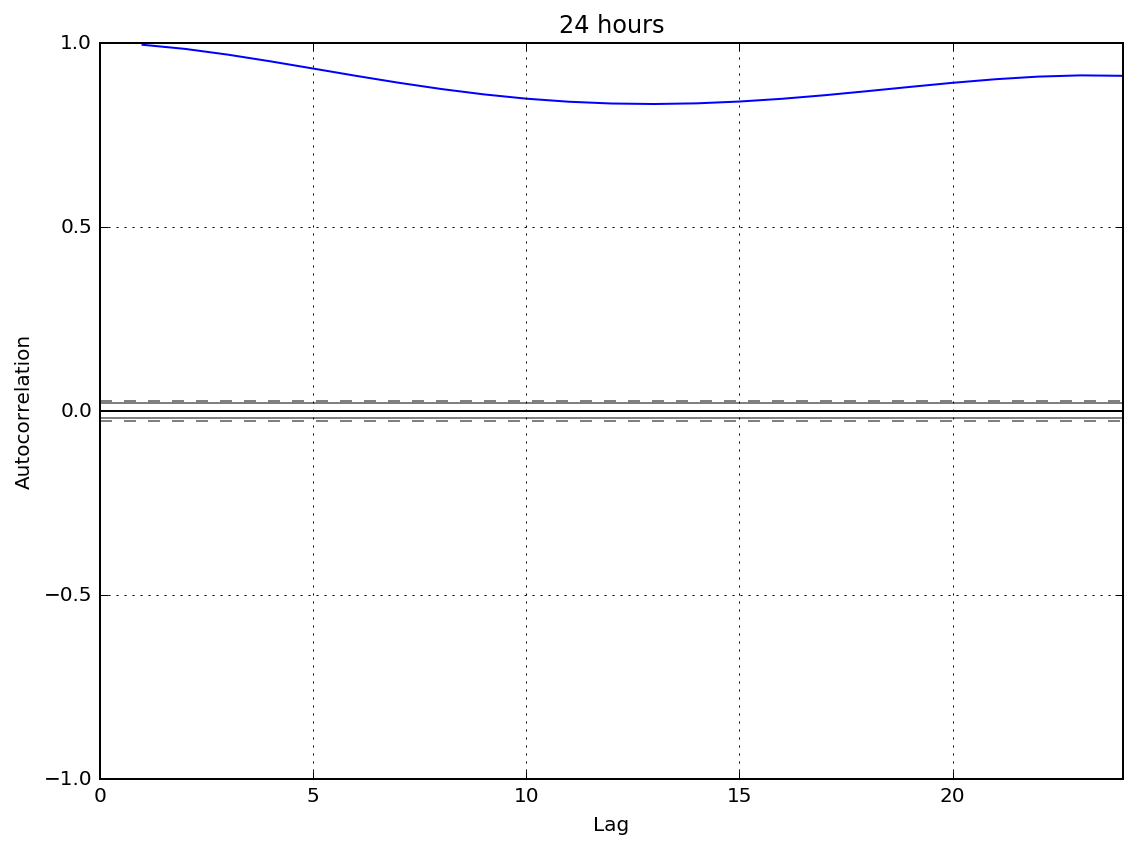

In [9]:
autocorrelation_plot(first.dropna().resample('1H').mean().dropna().values)
plt.xlim(0,24)
plt.title("24 hours")

/Users/imolk/bin/venv_python3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


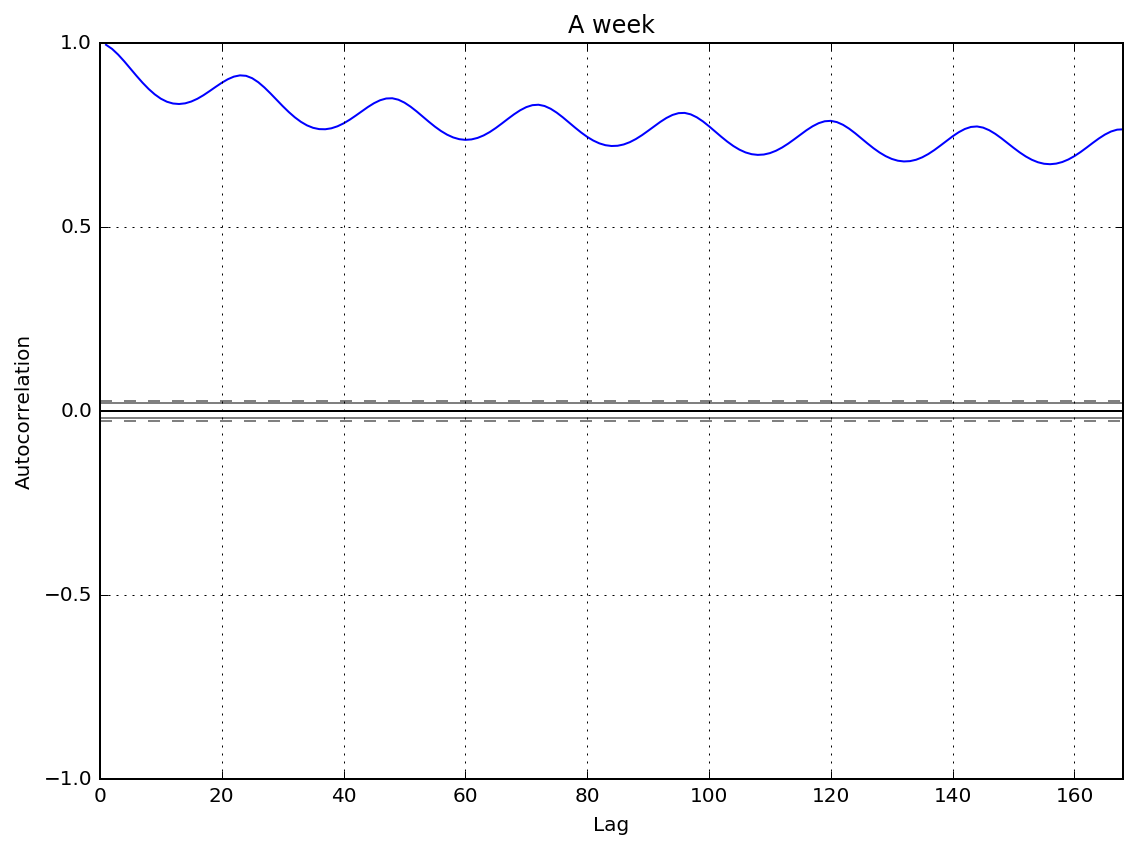

In [10]:
autocorrelation_plot(first.dropna().resample('1H').mean().dropna().values)
plt.xlim(0,24*7)
plt.title("A week")

/Users/imolk/bin/venv_python3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


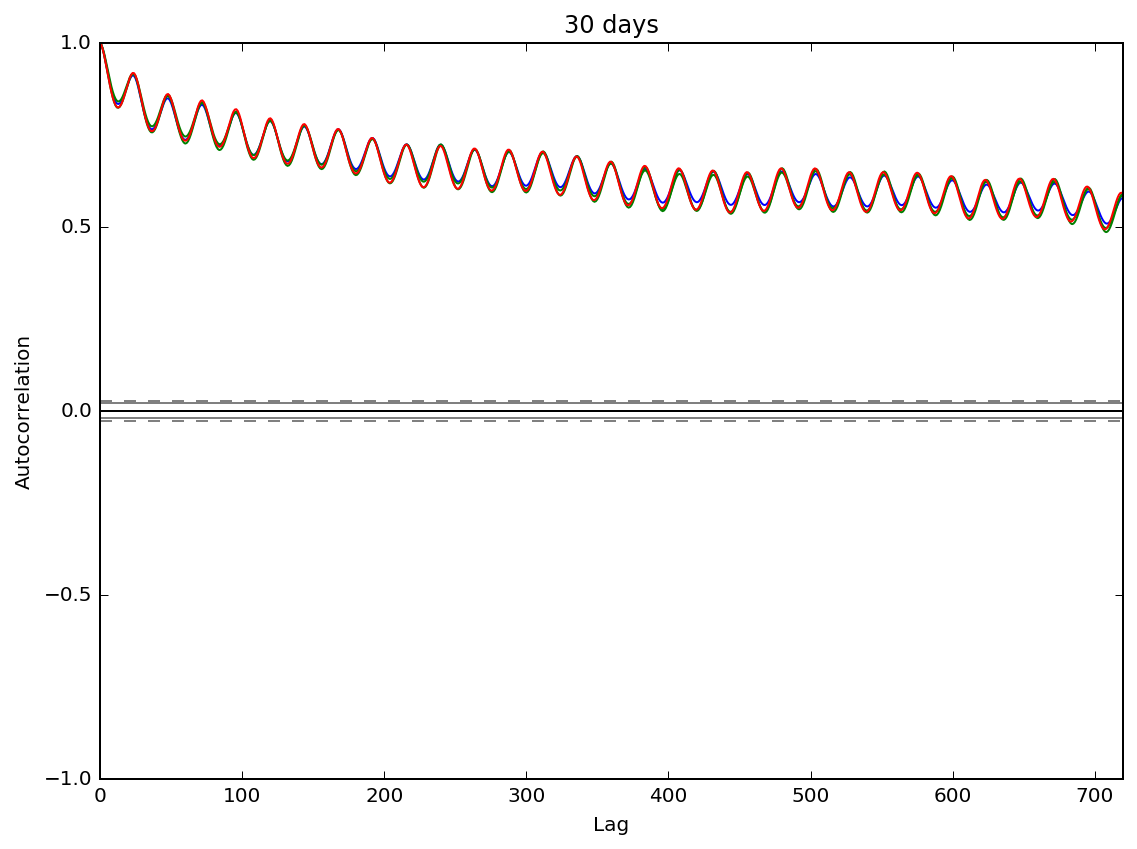

In [11]:
autocorrelation_plot(first.dropna().resample('1H').mean().dropna().values)
autocorrelation_plot(hourly_ls[1].dropna().resample('1H').mean().dropna().values, ax=plt.gca(), color="green")
autocorrelation_plot(hourly_ls[2].dropna().resample('1H').mean().dropna().values, ax=plt.gca(), color="green")
autocorrelation_plot(hourly_ls[3].dropna().resample('1H').mean().dropna().values, ax=plt.gca(), color="red")
plt.xlim(0,24*30)
plt.title("30 days")

/Users/imolk/bin/venv_python3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


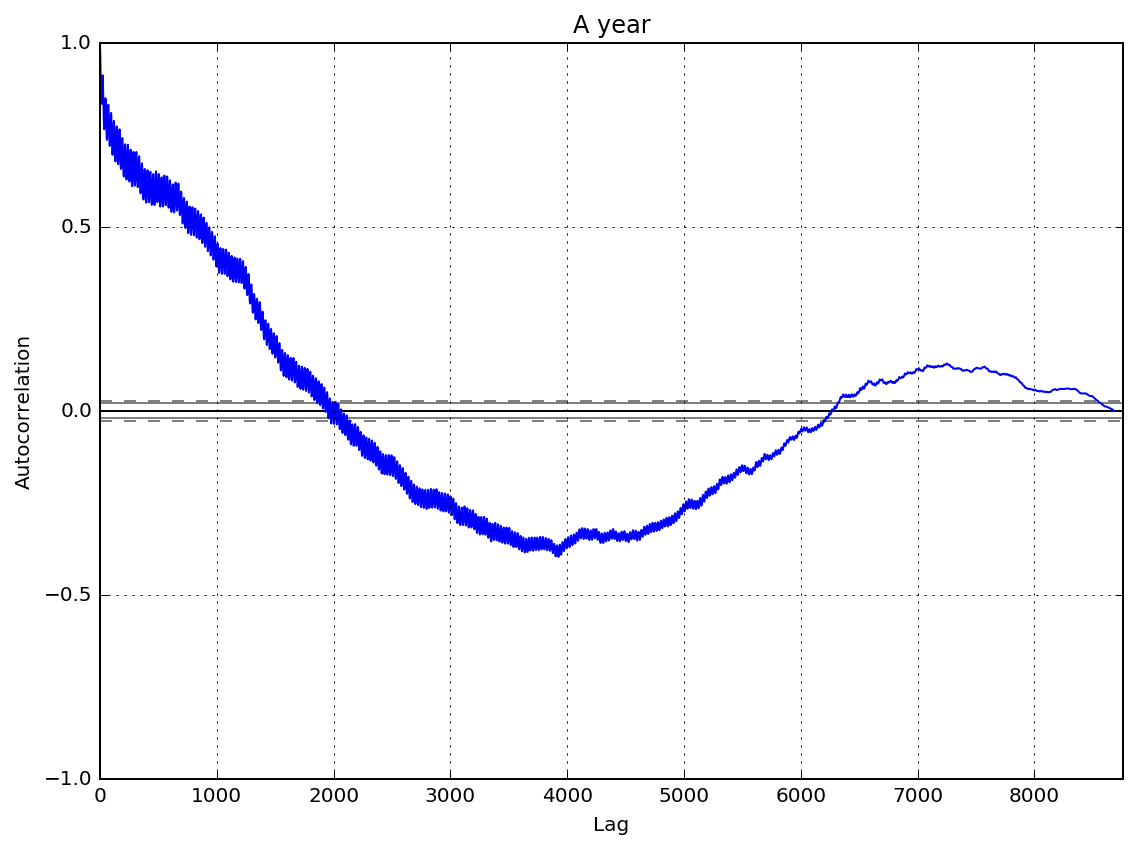

In [12]:
autocorrelation_plot(first.dropna().resample('1H').mean().dropna().values)
plt.xlim(0,24*365)
plt.title("A year")

In [13]:
??autocorrelation_plot